<a href="https://colab.research.google.com/github/LuigiFerrari14/Python/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DecisionTree

In [222]:
import pandas as pd

In [223]:
dados = pd.read_csv('/content/drive/MyDrive/Dados python/melb_data.csv')
dados.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [224]:
dados.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [225]:
dados.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [226]:
#drop os valores vazios
dados = dados.dropna(axis=0)

In [227]:
#o valor que queremos prever é chamado de y. Neste caso será o preço
y = dados.Price
y

1        1035000.0
2        1465000.0
4        1600000.0
6        1876000.0
7        1636000.0
           ...    
12205     601000.0
12206    1050000.0
12207     385000.0
12209     560000.0
12212    2450000.0
Name: Price, Length: 6196, dtype: float64

In [228]:
#features = colunas que sao usadas para determinar o preço da casa
dados_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']

#O grupo de features sao chamados de X
X = dados[dados_features]
X

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,79.00,1900.0,-37.80790,144.99340
2,3,2.0,134.0,150.00,1900.0,-37.80930,144.99440
4,4,1.0,120.0,142.00,2014.0,-37.80720,144.99410
6,3,2.0,245.0,210.00,1910.0,-37.80240,144.99930
7,2,1.0,256.0,107.00,1890.0,-37.80600,144.99540
...,...,...,...,...,...,...,...
12205,3,2.0,972.0,149.00,1996.0,-37.51232,145.13282
12206,3,1.0,179.0,115.00,1890.0,-37.86558,144.90474
12207,1,1.0,0.0,35.64,1967.0,-37.85588,144.89936
12209,2,1.0,0.0,61.60,2012.0,-37.85581,144.99025


In [229]:
X.describe()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,141.568645,1964.081988,-37.807904,144.990201
std,0.971079,0.711362,897.449881,90.834824,38.105673,0.075850,0.099165
min,1.000000,1.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350


In [230]:
X.head()

,Rooms,Bathroom,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
1,2,1.0,156.0,79.0,1900.0,-37.8079,144.9934
2,3,2.0,134.0,150.0,1900.0,-37.8093,144.9944
4,4,1.0,120.0,142.0,2014.0,-37.8072,144.9941
6,3,2.0,245.0,210.0,1910.0,-37.8024,144.9993
7,2,1.0,256.0,107.0,1890.0,-37.8060,144.9954


In [231]:
#importar a livraria scikit-learn - modelo arvore
from sklearn.tree import DecisionTreeRegressor

# Definir o modelo. Especifique um número para random_state para garantir os mesmos resultados a cada execução
dados_modelo = DecisionTreeRegressor()

#fit model
dados_modelo.fit(X, y)

DecisionTreeRegressor()

In [232]:
print('Fazendo previsões de preço destas 5 casas: ')
print(X.head())
print('As previsões são: ')
print(dados_modelo.predict(X.head()))
print('Preços reais: ')
print(y.head().tolist())

Fazendo previsões de preço destas 5 casas: 
   Rooms  Bathroom  Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude
1      2       1.0     156.0          79.0     1900.0   -37.8079    144.9934
2      3       2.0     134.0         150.0     1900.0   -37.8093    144.9944
4      4       1.0     120.0         142.0     2014.0   -37.8072    144.9941
6      3       2.0     245.0         210.0     1910.0   -37.8024    144.9993
7      2       1.0     256.0         107.0     1890.0   -37.8060    144.9954
As previsões são: 
[1035000. 1465000. 1600000. 1876000. 1636000.]
Preços reais: 
[1035000.0, 1465000.0, 1600000.0, 1876000.0, 1636000.0]


O erro absoluto médio para os dados na amostra foi de cerca de 500 dólares. 

In [233]:
#predicted error - MAE
from sklearn.metrics import mean_absolute_error
predicted_preco_casas = dados_modelo.predict(X)
mean_absolute_error(y, predicted_preco_casas)

434.71594577146544

Fora da amostra é mais de 250.000 dólares.

Esta é a diferença entre um modelo que é quase exatamente correto e um que é inutilizável para a maioria dos propósitos práticos. Como ponto de referência, o valor médio da casa nos dados de validação é de 1,1 milhão de dólares. Portanto, o erro em novos dados é cerca de um quarto do valor médio da casa.

Essa diferença ocorre, pois no exemplo abaixo, nos dividimos o total de dados, usando metade para treino, e metade para validação. Então TODOS os valores que entram no validação, não são conhecidos. Já no exemplo acima, todos os dados já foram testados.

In [234]:
#dividir os dados em 2. uma parte para o fit e a outra para o mean absolute error
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
#definir o modelo
dados_modelo = DecisionTreeRegressor()

#fit modelo
dados_modelo.fit(train_X, train_y)

#obeter os preços previstos em dados de validacao
val_predictions = dados_modelo.predict(val_X)
print(val_predictions)
print(mean_absolute_error(val_y, val_predictions))

[ 937500.  550000. 1015000. ...  240000. 1110000. 1303000.]
261274.20852162686


In [235]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [236]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  254983


In [237]:
#melhor resultado - menor media de erro
best_tree_size = 500

In [238]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)

In [239]:
#predicted error - MAE
from sklearn.metrics import mean_absolute_error
predicted_preco_casas = final_model.predict(X)
mean_absolute_error(y, predicted_preco_casas)

116715.01413824897

#Random Forest

In [240]:
import pandas as pd
    
# Load data
melbourne_file_path = '/content/drive/MyDrive/Dados python/melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
# Filter rows with missing values
melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print("Validation MAE for Random Forest Model: {}".format(mean_absolute_error(val_y, melb_preds)))

Validation MAE for Random Forest Model: 191669.7536453626


#animal - basico LinearSVC

In [242]:
#pelo longo?
#perna curta?
#faz auau?
porco1 = [0,1,0]
porco2 = [0,1,1]
porco3 = [1,1,0]

cachorro1 = [0,1,1]
cachorro2 = [1,0,1]
cachorro3 = [1,1,1]

treino_X = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] #1porco, 0cachorro

In [243]:
from sklearn.svm import LinearSVC
modelo = LinearSVC()
modelo.fit(treino_X, treino_y)

LinearSVC()

In [244]:
animal_misterioso = [1,1,1]
modelo.predict([animal_misterioso])

array([0])

In [245]:
m1 = [1,1,1]
m2 = [1,1,0]
m3 = [0,1,1]

teste_x = [m1,m2,m3]
teste_y = [0,1,1]

In [246]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 1, 0])

In [247]:
from sklearn.metrics import accuracy_score

accuracy_score(teste_y, previsoes)

0.6666666666666666

#K-Means

In [248]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Dados python/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA


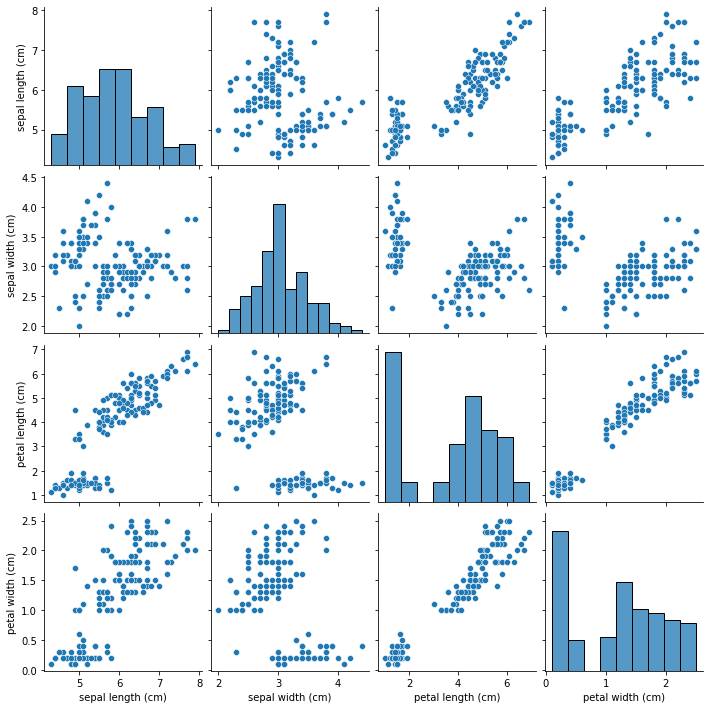

In [249]:
import seaborn as sb
sb.pairplot(df)

In [250]:
#tirar o target e passar o resto como caracteristicas para o sistema me dizer onde cada uma pertence.
import numpy as np
#X = np.array(df.drop('target', axis=1))
X = df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [251]:
from sklearn.cluster import KMeans
#             total de clusters
kmeans = KMeans(n_clusters=3, random_state=0)

In [252]:
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [253]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [254]:
#Criar um coluna de dados ao lada da target
df['Kclasses'] = kmeans.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Kclasses
0,5.1,3.5,1.4,0.2,SETOSA,1
1,4.9,3.0,1.4,0.2,SETOSA,1
2,4.7,3.2,1.3,0.2,SETOSA,1
3,4.6,3.1,1.5,0.2,SETOSA,1
4,5.0,3.6,1.4,0.2,SETOSA,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,VIRGINICA,2
146,6.3,2.5,5.0,1.9,VIRGINICA,0
147,6.5,3.0,5.2,2.0,VIRGINICA,2
148,6.2,3.4,5.4,2.3,VIRGINICA,2


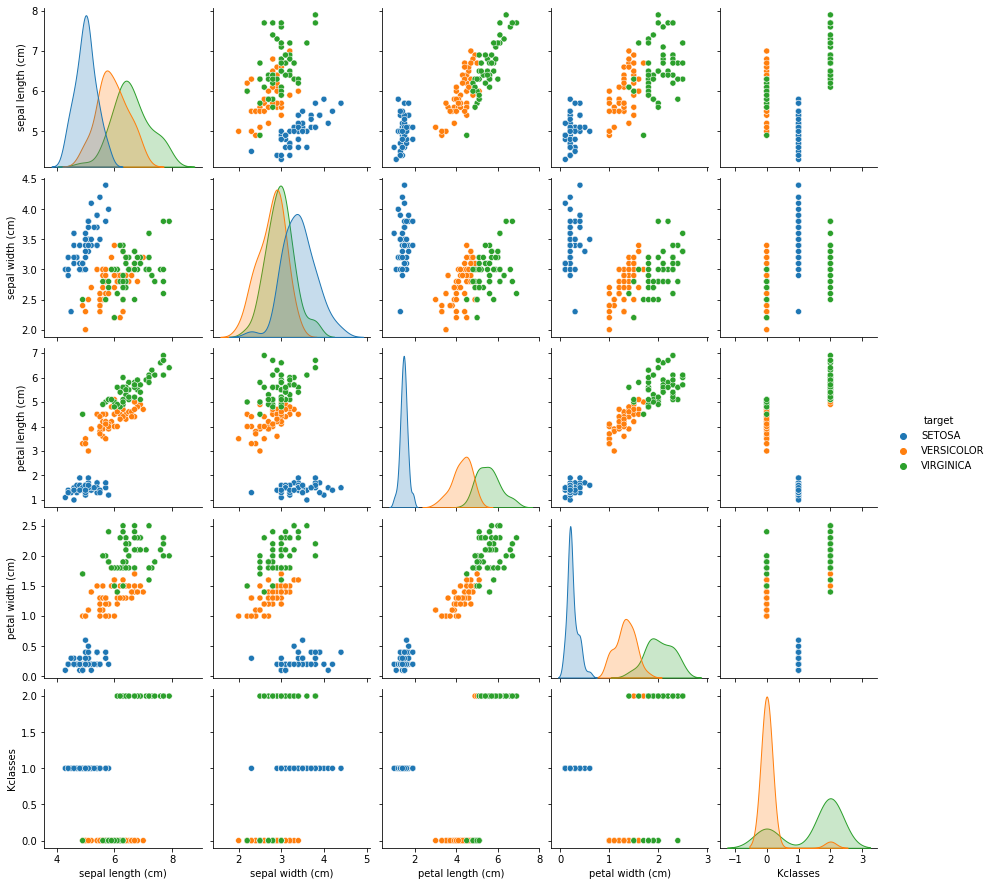

In [255]:
#original
sb.pairplot(df,hue='target')

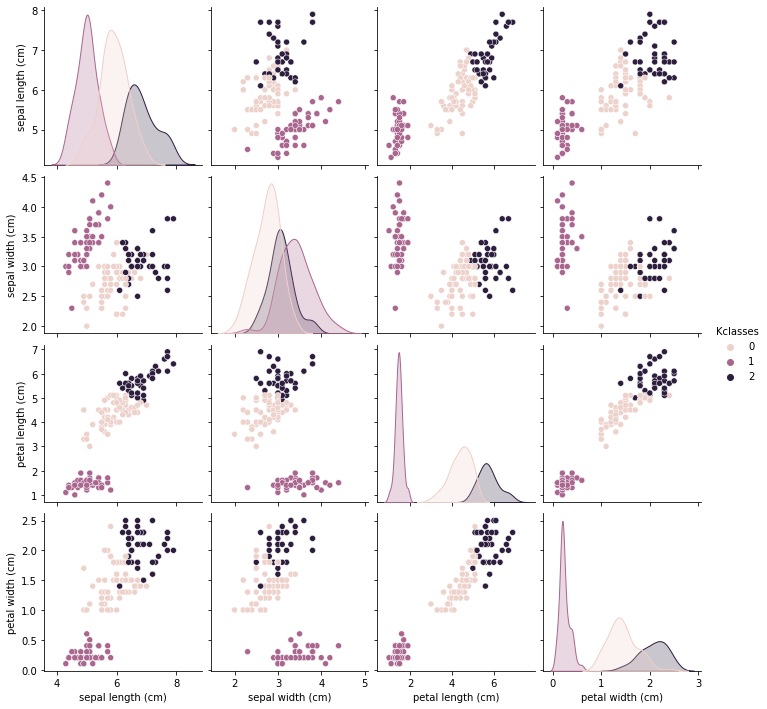

In [256]:
#visualizacao do kclasses criado pelo Kmeans
sb.pairplot(df,hue='Kclasses')

In [257]:
df = pd.read_csv('/content/drive/MyDrive/Dados python/iris.csv')
#contar unique values NUNIQUE, caso tenha uma grande qtd de dados no df/ para saber preencher o n_clusters
df['target'].nunique()


3

#Linear Regression

In [258]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

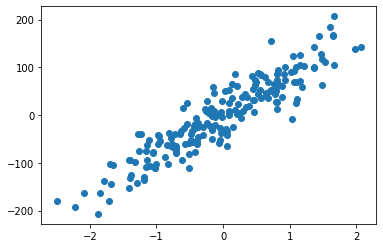

In [259]:
#regression
x,y = make_regression(n_samples=200, n_features=1, noise=30)
plt.scatter(x,y)

In [260]:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression()

In [261]:
#coeficiente angular - inclinação da reta em relacao ao eixo
a_coeff = modelo.coef_
#coeficiente linear - ponto do Y (o intercepto)
l_coeff = modelo.intercept_

In [262]:
print(a_coeff)
print(l_coeff)

#y= a+b* x(valor passado)
y= l_coeff + a_coeff * x

[80.90761858]
1.3974782889990127


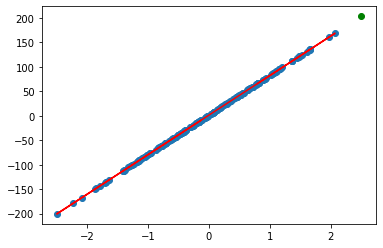

In [263]:
plt.scatter(x,y)
plt.plot(x,l_coeff + a_coeff * x, color='red')
plt.scatter(2.5, l_coeff + a_coeff*2.5, color='green')
plt.show()

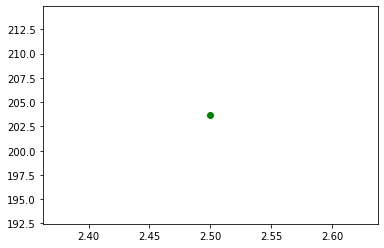

In [264]:
#ex com 2.5
plt.scatter(2.5, l_coeff + a_coeff*2.5, color='green')
plt.show()

In [265]:
valorteste = l_coeff + a_coeff * 2.5
print(valorteste)

[203.66652474]


**Exemplo**

In [266]:
#exemplo preço de casas
df = pd.read_csv("/content/drive/MyDrive/Dados python/melb_data.csv")
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [270]:
#df.fillna(0,inplace = True)
df = df.dropna(axis=0)
features = ['Landsize', 'Rooms','YearBuilt']
X = df[features]
y = df['Price']

#Caso seja so um valor na feature - usar o reshape
#X = X.values.reshape(-1,1)
#y = y.values.reshape(-1,1)


In [271]:
modelo = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=4)

In [272]:
modelo.fit(x_train,y_train)

LinearRegression()

In [273]:
a_coeff = modelo.coef_
l_coeff = modelo.intercept_

In [274]:
previsao=modelo.predict(x_test)
previsao

array([1277110.28468418, 1508435.82049217,  854772.20204913, ...,
       1115558.29878542, 1215604.73064668, 1799216.25752977])

In [275]:
#comparacao
previsao[1]

1508435.8204921708

In [276]:
y_test

6185     1251000.0
7150     1400000.0
56        700000.0
5219      420000.0
8636      917500.0
           ...    
7016      430000.0
5346     3001000.0
10154     860000.0
10923    4050000.0
272      3625000.0
Name: Price, Length: 1240, dtype: float64